In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dataclosed = sio.loadmat('DataOpen.mat')
data_c = np.array(dataclosed['DataOpen'])

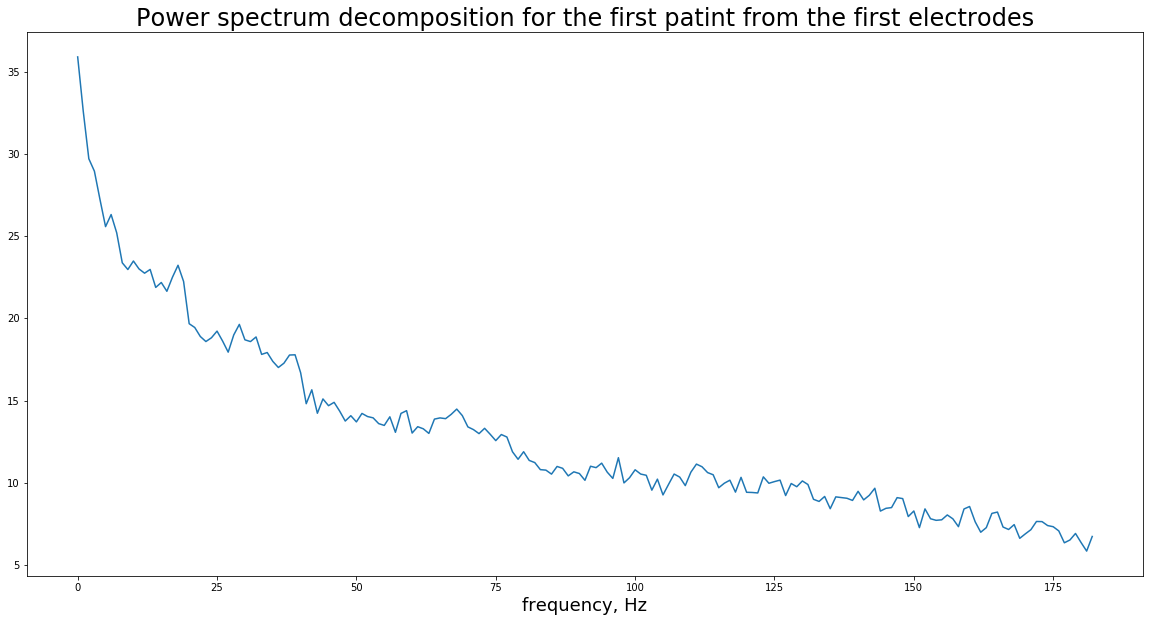

In [2]:
yaxis = data_c[0][0]
xaxis = np.arange(0, len(data_c[0][0]))
plt.figure(figsize=(20,10))
plt.plot(xaxis, yaxis)
plt.xlabel('frequency, Hz', fontsize=18)
plt.title('Power spectrum decomposition for the first patint from the first electrodes', fontsize=24)
plt.show()

In [3]:
data_avg = np.mean(data_c[0][:], axis = 0)

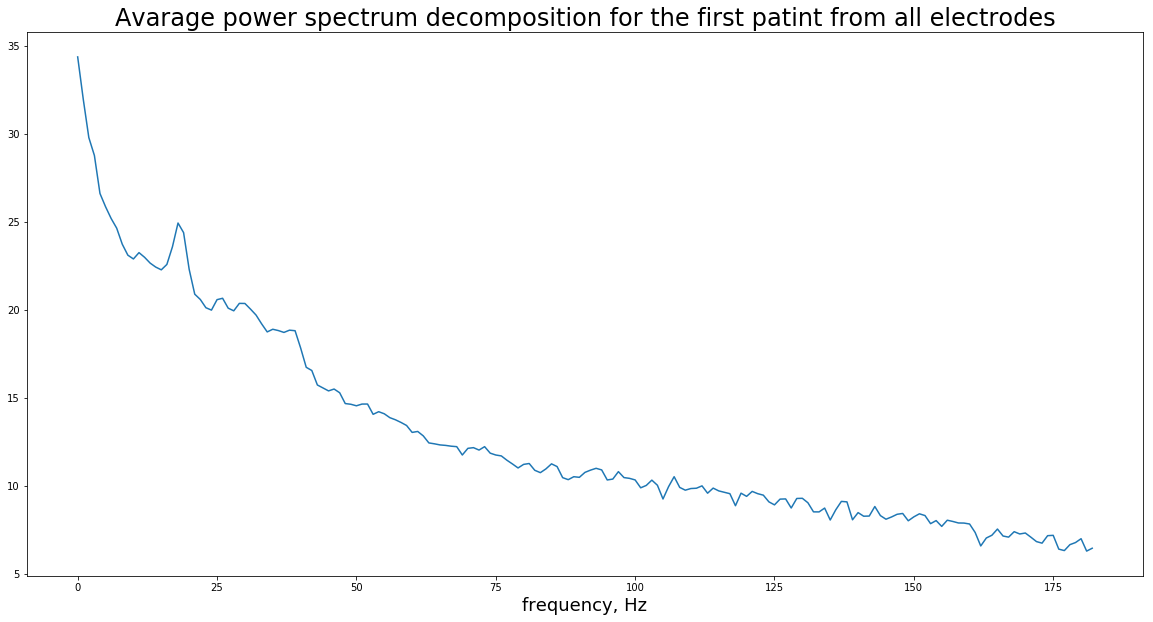

In [4]:
yaxis = data_avg 
xaxis = np.arange(0, len(data_avg ))
plt.figure(figsize=(20,10))
plt.plot(xaxis, yaxis)
plt.xlabel('frequency, Hz', fontsize=18)
plt.title('Avarage power spectrum decomposition for the first patint from all electrodes', fontsize=24)
plt.show()

In [5]:
COLUMN_NAMES=np.arange(183)
df = pd.DataFrame(columns=COLUMN_NAMES)
for i in range(len(data_c)):
    df.loc[i] = (np.mean(data_c[i][:], axis = 0))

In [6]:
x = StandardScaler().fit_transform(df)

2 dataset!

* 1st: df (initial data, avarage from 32 electrodes)

* 2nd: x (standartised data)

In [8]:
pca_model_f = PCA(n_components=2, svd_solver = 'full')
pca_model_f.fit(df)
print(pca_model_f.explained_variance_ratio_)  
pca_transformed_f = pd.DataFrame(data = pca_model_f.transform(df)
             , columns = ['principal component 1', 'principal component 2'])
pca_transformed_f.shape

[ 0.7864921   0.11495469]


(289, 2)

Explained variance is really important measure for understanding the lost amount of data after transforming high dimensional dataset to 2 dimensions for example.

In [9]:
pca_model_f = PCA(n_components=2, svd_solver = 'full')
pca_model_f.fit(x)
print(pca_model_f.explained_variance_ratio_)  
pca_transformed_f = pd.DataFrame(data = pca_model_f.transform(x)
             , columns = ['principal component 1', 'principal component 2'])
pca_transformed_f.shape

[ 0.73221814  0.14451074]


(289, 2)

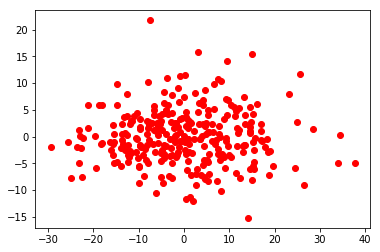

In [10]:
plt.plot(pca_transformed_f['principal component 1'], pca_transformed_f['principal component 2'], 'ro')
plt.show()

In [59]:
COLUMN_NAMES=np.arange(183)
df = pd.DataFrame(columns=COLUMN_NAMES)
for i in range(len(data_c)):
    df.loc[i] = (np.mean(data_c[i][:], axis = 0))

In [60]:
x = pd.DataFrame(x, columns = list(df))

Pefrorming t-SNE

In [61]:
from sklearn.manifold import TSNE

n_sne = 7000
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 289 samples in 0.003s...
[t-SNE] Computed neighbors for 289 samples in 0.059s...
[t-SNE] Computed conditional probabilities for sample 289 / 289
[t-SNE] Mean sigma: 4.322454
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.541668
[t-SNE] Error after 300 iterations: 0.437013


In [62]:
import matplotlib.pyplot as plt

# allows to output plots in the notebook
%matplotlib inline 

# makes inline plots to have better quality (can replace svg with retina as well)
%config InlineBackend.figure_format = 'svg'

# can change the default style of plots - google for more choices
plt.style.use("ggplot")

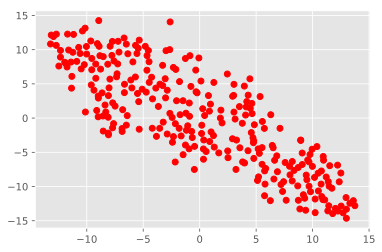

In [63]:
df_tsne = pd.DataFrame()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

plt.plot(df_tsne['x-tsne'], df_tsne['y-tsne'], 'ro')
plt.show()

In [64]:
classes = pd.read_csv("classes.csv", header=None)
#classes_new = pd.read_csv("classes_new.csv")

In [66]:
classes.columns = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuriticism']
df_class = pd.concat([df, classes], axis = 1)
x_class = pd.concat([x, classes], axis = 1)
#df_class_new = pd.concat([df, classes_new], axis = 1)
#x_class_new = pd.concat([x, classes_new], axis = 1)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 289 samples in 0.003s...
[t-SNE] Computed neighbors for 289 samples in 0.045s...
[t-SNE] Computed conditional probabilities for sample 289 / 289
[t-SNE] Mean sigma: 7.075437
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.178913
[t-SNE] Error after 300 iterations: 0.417792


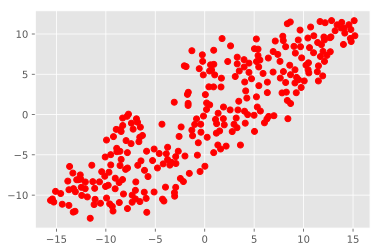

In [67]:
tsne_results = tsne.fit_transform(df_class)

df_tsne = pd.DataFrame()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

plt.plot(df_tsne['x-tsne'], df_tsne['y-tsne'], 'ro')
plt.show()

In [88]:
pca_n = KernelPCA(n_components=2, kernel='poly', degree=5, eigen_solver='auto')
pca_n.fit(df_class)
pca_data = pd.DataFrame(data = pca_n.transform(df_class)
             , columns = ['principal component 1', 'principal component 2'])

pca_data = pd.concat([pca_data, classes], axis = 1)
pca_data.head()

,principal component 1,principal component 2,Openness,Conscientiousness,Extraversion,Agreeableness,Neuriticism
0,-456749.649430,-22911.836809,0,1,1,0,0
1,-149900.379203,-109472.703386,0,1,0,0,1
2,-292066.427595,23315.838904,0,1,1,1,1
3,-335738.481165,-13335.028055,1,1,0,1,1
4,7251.811498,-118702.535744,1,1,0,1,0


Text(0.5,1,'Principal component analysis')

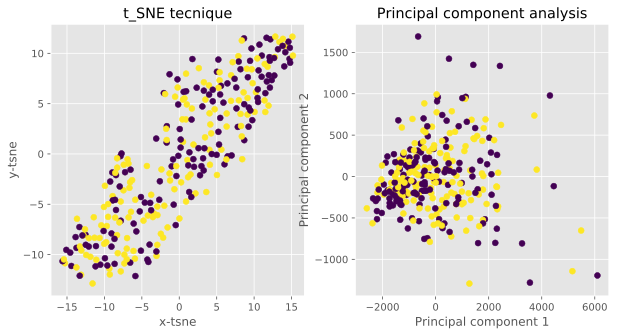

In [82]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title('t_SNE tecnique')
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=x_class['Conscientiousness'])
plt.subplot(122)
plt.scatter(pca_data['principal component 1'], pca_data['principal component 2'], c=x_class['Conscientiousness'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Principal component analysis')

Text(0.5,1,'Principal component analysis')

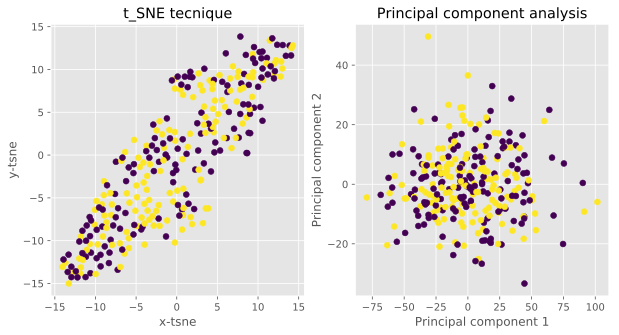

In [31]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title('t_SNE tecnique')
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=x_class['Extraversion'])
plt.subplot(122)
plt.scatter(pca_data['principal component 1'], pca_data['principal component 2'], c=x_class['Extraversion'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Principal component analysis')

Text(0.5,1,'Principal component analysis')

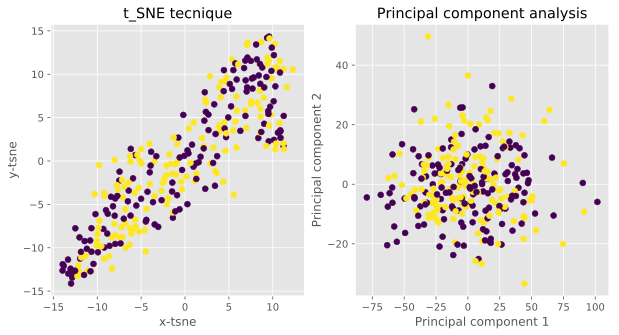

In [45]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title('t_SNE tecnique')
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=x_class['Agreeableness'])
plt.subplot(122)
plt.scatter(pca_data['principal component 1'], pca_data['principal component 2'], c=x_class['Agreeableness'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Principal component analysis')

Text(0.5,1,'Principal component analysis')

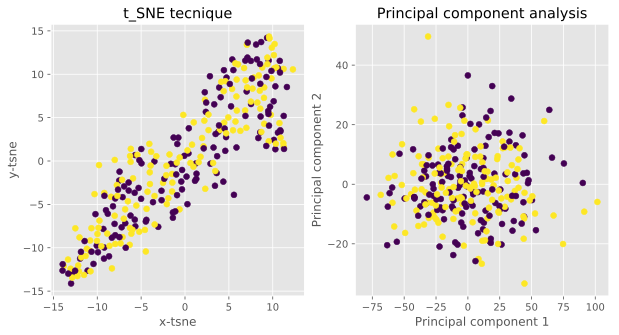

In [46]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.xlabel('x-tsne')
plt.ylabel('y-tsne')
plt.title('t_SNE tecnique')
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=x_class['Neuriticism'])
plt.subplot(122)
plt.scatter(pca_data['principal component 1'], pca_data['principal component 2'], c=x_class['Neuriticism'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Principal component analysis')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 289 samples in 0.003s...
[t-SNE] Computed neighbors for 289 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 289 / 289
[t-SNE] Mean sigma: 4.325040
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.253471
[t-SNE] Error after 300 iterations: 0.392982


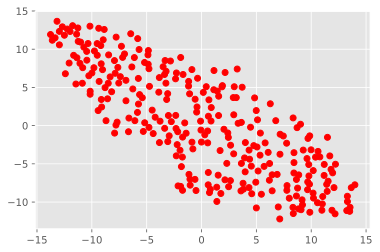

In [32]:
tsne_results = tsne.fit_transform(x_class)

df_tsne = pd.DataFrame()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

plt.plot(df_tsne['x-tsne'], df_tsne['y-tsne'], 'ro')
plt.show()